In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [60]:
# A basic Point class
class Point(object):
    # Stores all Point objects
    __all = []
    
    # Constructor, Accepts 2~3 numbers as its coordinates. 
    # For instance, to initialize a (1, 1, 1) point, write `Point(1, 1, 1)`
    # @params: 
    #     *coordinates: 2~3 integers, represents a point's coordinates
    # return: none
    # raise: 
    #      ValueError if the dimension of a point is not 2 or 3
    #      ValueError if not all entries are Numbers
    def __init__(self, *coordinates):
        self.id = len(self.__all)
        if not len(list(filter(lambda x: not ((type(x) == int) or (type(x) == float) 
                                              or (type(x) == bool) or (type(x) == complex)), coordinates))) == 0:
            raise ValueError("All entries should be numeric for a Point object. ")
        self.coordinates = coordinates
        if len(self.coordinates) == 3:
            self.dimension = 3
        elif len(self.coordinates) == 2:
            self.dimension = 2
        else:
            raise ValueError("Dimension of a point should be either 2 or 3.")
        self.__all.append(self)
    
    # Find a point's internal ID, not used. 
    # @Params: None
    # return: int, id of the point
    def internal_id(self):
        return self.id

    # Find a point by its internal ID, not used. 
    # @params: 
    #      id_num: int, id of the point
    # return: 
    #      corresponding Point object
    # raise: 
    #     ValueError if the point is not found
    def find_by_id(id_num):
        if (id_num >= len(Point.__all) or id_num < 0):
            raise ValueError("ID number not found.")
        else:
            return Point.__all[id_num].coordinates

    # Calculate a point's distance to another point. 
    # @Params: 
    #      other: Another point object, representing the "other point"
    # return: 
    #      float, the distance between these two points
    # raise: 
    #      ValueError if the two points' dimension does not match
    def distance(self, other):
        if not self.dimension == other.dimension:
            raise ValueError("Dimension Not Match")
        distance_sum = sum([(self.coordinates[x] - other.coordinates[x])**2 for x in range(self.dimension)])
        return distance_sum**0.5
    
    # toString() function of Point
    # Output format of "(a, b, c)"
    # @params: none
    # return: str, a string of the Point
    # raise: none
    def __str__(self):
        if self.dimension == 3:
            return "(%s, %s, %s)" % self.coordinates
        else:
            return "(%s, %s)" % self.coordinates
    
    pass

In [74]:
class Surface(object):
    
    # Stores all Surface objects
    __all = []

    # Constructor, accepts a series of points as its parameter. 
    # Automatically forms a closed surface, so no need to add the start point again to the parameter
    # Can define Point objects explicitly or pass in lists & tuples, will automatically assemble them to Point objects
    # @Params:
    #      *points: 3+ abstractly expressed points, accpet Point, list, or tuple objects
    #      name: the name of the surface, optional
    # returns: none
    # raise:
    #      ValueError if not all points have dimensions 3
    #      ValueError if contains values other than tuple, list, or Point
    #      ValueError if tries to define a surface with 2 or less points
    #      ValueError if not all points are on the same plane. 
    #      ValueError created by Point() constructors
    def __init__(self, *points, name=""):
        self.id = len(self.__all)
        points_list = [x for x in points]
        i = 0
        while True:
            point = None
            
            try:
                point = points_list[i]
            except IndexError as e:
                break
            
            if type(point) == Point:
                if not point.dimension == 3:
                    raise ValueError("Dimension of all points should be 3. ")
            else:
                if type(point) == tuple or type(point) == list:
                    points_list[i] = Point(*point)
                    continue
                else:
                    raise ValueError("Should only pass in tuple, list, or Point objects.")
            i += 1
        
        self.points = points_list
        if len(self.points) < 3: 
            raise ValueError("A surface should at least have three points defined. ")
        elif len(self.points) > 3: 
            self.check_coplane()
        self.points.append(points_list[0])
        if name == "":
            self.name = "surface id: " + str(self.id)
        else:
            self.name = name
        self.edge_counts = len(self.points) - 1
        self.__all.append(self)
    
    # Locates the surface by id, not used
    # @Params: 
    #      id_num: integer, the id of the surface
    # return: 
    #      surface object with corresponding id number
    # raise: 
    #      ValueError if id not found
    def find_by_id(id_num):
        if (id_num >= len(Surface.__all) or id_num < 0):
            raise ValueError("ID Number not found.")
        else:
            return Surface.__all[id_num]

    # Adds the surface to the 3-d plot
    # @params: 
    #      fig: a subplot of a figure, NOTICE THIS SUBPLOT SHOULD HAVE projection="3d" INCLUDED
    # return: none
    # raise: 
    #      All errors that plot() and scatter() raises
    def add_to_figure(self, fig):
        lines = []
        for point in self.points:
            fig.scatter(*point.coordinates)
            lines.append(point.coordinates)
        lines.append(self.points[0].coordinates)
        fig.plot([x[0] for x in lines], [x[1] for x in lines], [x[2] for x in lines], label=self.name)
        fig.legend()
        return
            
    # plots and shows the surface in 3-d space
    # @params: none
    # return: none
    # raise: none
    def plot_3d(self):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection="3d")
        self.add_to_figure(ax)
        plt.show()
    
    # Checks if all points of a surface is in the same plane. 
    # @params: none
    # return: none
    # raise: 
    #      ValueError if not all points are in a same plane.
    def check_coplane(self):
        init_points = [self.points[x] for x in range(3)]
        p = init_points[0].coordinates
        q = init_points[1].coordinates
        r = init_points[2].coordinates
        # Find pq and pr vectors
        pq = [q[x] - p[x] for x in range(3)]
        pr = [r[x] - p[x] for x in range(3)]
        
        # Find cross product
        n = np.cross(pq, pr)
        
        # And a, b, c = n[0, 1, 2]
        a, b, c = n[0], n[1], n[2]
        d = -1 * (a * p[0] + b * p[1] + c * p[2])
        
        # Formula: ax + by + cz + d = 0
        
        # Validate
        q_calc = a * q[0] + b * q[1] + c * q[2] + d
        r_calc = a * r[0] + b * r[1] + c * r[2] + d
        precision = 1e-5
        if abs(q_calc) > precision or abs(r_calc) > precision:
            raise ValueError("Calculation Error, this should not occur. ")
        
        # Verify for all other points
        for point in self.points[3:]:
            coordinates = point.coordinates
            coordinate_calc = a * coordinates[0] + b * coordinates[1] + c * coordinates[2] + d
            if abs(coordinate_calc) > precision:
                raise ValueError("Point " + str(point) + " not in the surface. ")
        return
        
    # Convert a 3-d surface to 2-d surface with all its properties unchanged
    # NOT YET IMPLEMENTED
    def plot_to_2d(self, start_point, fig):
        raise ValueError("Not yet implemented. ")
        return start_point


$$ p = (p_1, p_2, p_3) $$
$$ q = (q_1, q_2, q_3) $$
$$ r = (r_1, r_2, r_3) $$
<br />
$$ \mathbf{pq} = (q_1 - p_1, q_2 - p_2, q_3 - p_3) $$
$$ \mathbf{pr} = (r_1 - p_1, r_2 - p_2, r_3 - p_3) $$
$$ \mathbf{n} = \mathbf{pq} \times \mathbf{pr} $$

In [75]:
# A 3-d model object
class Model(object):
    
    # Constructor, accepts a series of surfaces
    # @params: 
    #      *surfaces: a list of surfaces, can have zero surface
    def __init__(self, *surfaces):
        self.surfaces = surfaces
        self.dimension = (0, 0, 0) # Default value of a dimension is (0, 0, 0)
    
    # plots the 3-d object
    # @params: none
    # return: none
    # raise: none
    def plot(self):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        max_dim = sorted(self.dimension)[-1] * 2
        if max_dim < 3:
            max_dim = 3
        ax.set(xlim=(0, max_dim), ylim=(0, max_dim), zlim=(0, max_dim))
        for surface in self.surfaces:
            surface.add_to_figure(ax)
        plt.show()
        
    # converts this 3-d object to 2-d plot. NOT YET IMPLEMENTED
    def to_2d(self):
        fig = plt.figure()
        start_point = (1, 1)
        for surface in self.surfaces:
            start_point = surface.plot_to_2d(start_point, fig)
        plt.show()

In [76]:
# A simple Cuboid object
class Cuboid(Model):
    
    # Constructor for a Cuboid
    # @params: 
    #      a, b, h: int, properties of this cuboid
    # return: none
    # raise: none
    def __init__(self, a, b, h):
        points = []
        points.append((1, 1, 1)) # 0
        points.append((1+a, 1, 1)) # 1
        points.append((1, 1+b, 1)) # 2
        points.append((1+a, 1+b, 1)) # 3
        points.append((1, 1, 1+h)) # 4 
        points.append((1+a, 1, 1+h)) # 5
        points.append((1, 1+b, 1+h)) # 6
        points.append((1+a, 1+b, 1+h)) # 7
        
        surfaces = []
        
        surfaces.append(Surface(*[Point(*points[x]) for x in [0, 1, 3, 2]], name="lower")) # lower
        surfaces.append(Surface(*[Point(*points[x]) for x in [0, 1, 5, 4]], name="left")) # left
        surfaces.append(Surface(*[Point(*points[x]) for x in [0, 2, 6, 4]], name="back")) # back
        surfaces.append(Surface(*[Point(*points[x]) for x in [7, 6, 4, 5]], name="upper")) # upper
        surfaces.append(Surface(*[Point(*points[x]) for x in [7, 5, 1, 3]], name="front")) # front
        surfaces.append(Surface(*[Point(*points[x]) for x in [7, 6, 2, 3]], name="right")) # right
        
        self.surfaces = surfaces
        self.dimension = (a, b, h)
        
    # Builds the vectors for representing this cuboid in 2-d space
    # @params: none
    # return: 
    #      vectors: a list of vectors, representing all six surfaces
    #      vector_ids: a list of vector id, each element is a string
    # raise: none
    def build_vectors(self):
        vectors = []
        start_point = [1, 1]
        maximum_dimension = sorted(self.dimension)[-1]
        vector_ids = []
        for it in range(2):
            for dim_id in range(3):
                next_dim = dim_id + 1
                if next_dim >= 3:
                    next_dim = 0
                cur_surface = (self.dimension[dim_id], self.dimension[next_dim])
                factors = (cur_surface[0], cur_surface[1], -cur_surface[0], -cur_surface[1])
                p_1 = start_point.copy()
                p_2 = p_1.copy()
                points = [(p_1[0], p_1[1])]
                for f_counter in range(4):
                    p_2[f_counter % 2] += factors[f_counter]
                    points.append((p_2[0], p_2[1]))
                    p_1 = p_2.copy()
                vectors.append(points)
                vector_ids.append("%s, %s" % cur_surface)
                start_point[0] += (factors[0] + 1)
            start_point[0] = 1
            start_point[1] = 1 + maximum_dimension + 1
        return vectors, vector_ids
    
    # Plots the Cuboid in 2-d plane
    # @params: none
    # return: none
    # raise: none
    def plot_2d(self):
        vectors, vector_ids = self.build_vectors()
        for vector_id in range(len(vector_ids)):
            plt.plot([x[0] for x in vectors[vector_id]], [x[1] for x in vectors[vector_id]], 
                     label=vector_ids[vector_id])
            plt.legend()
        plt.show()
    
# A Cube model
class Cube(Model):
    # Constructor
    # @params: 
    #      a: int, property (side length) of the cube
    def __init__(self, a):
        Cuboid.__init__(self, a, a, a)

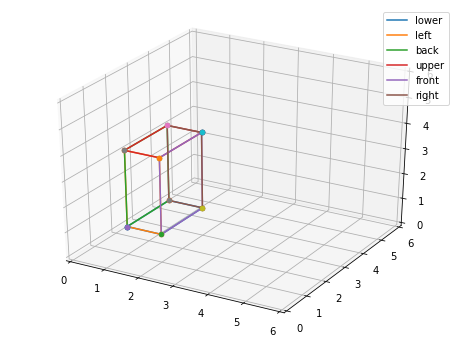

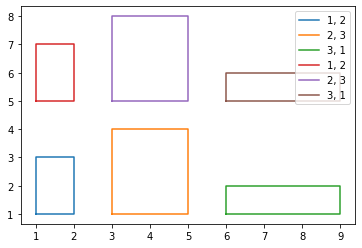

In [77]:
c = Cuboid(1, 2, 3)
c.plot()
c.plot_2d()

[<__main__.Point object at 0x11f3edf50>, <__main__.Point object at 0x11f3edcd0>, <__main__.Point object at 0x11f3edd50>, <__main__.Point object at 0x11f3edf50>]


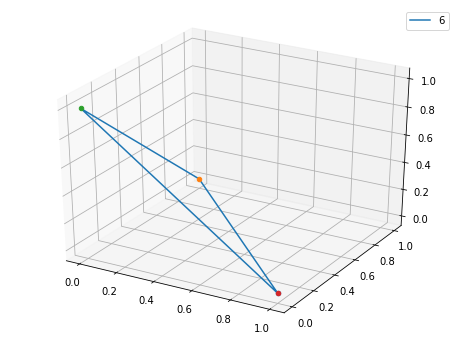

In [78]:
s = Surface((1, 0, 0), (0, 1, 0), (0, 0, 1))
print(s.points)
s.plot_3d()

NameError: name 'Number' is not defined

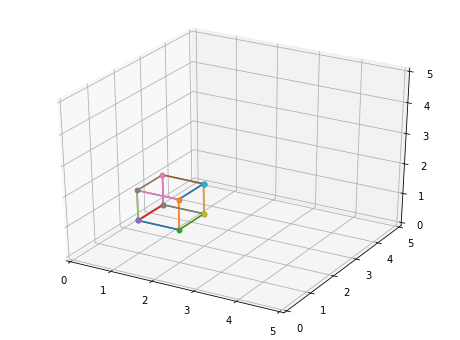

In [22]:
basic_figure = plt.figure(figsize=(8, 6))
axes = basic_figure.add_subplot(111, projection="3d")
axes.set(xlim=(0, 5), ylim=(0, 5), zlim=(0, 5))


surfaces_sample = {
    1: [(1, 1, 1), (1, 1, 2), (1, 2, 2), (1, 2, 1)],
    2: [(1, 1, 1), (2, 1, 1), (2, 1, 2), (1, 1, 2)], 
    3: [(1, 1, 1), (2, 1, 1), (2, 2, 1), (1, 2, 1)], 
    4: [(2, 2, 2), (2, 1, 2), (1, 1, 2), (1, 2, 2)],
    5: [(2, 2, 2), (2, 1, 2), (2, 1, 1), (2, 2, 1)], 
    6: [(2, 2, 2), (1, 2, 2), (1, 2, 1), (2, 2, 1)]
}

surfaces = []

for sample in surfaces_sample:
    surfaces.append(Surface(*[Point(x[0], x[1], x[2]) for x in surfaces_sample[sample]]))
    
for surface in surfaces:
    surface.add_to_figure(axes)

plt.show()

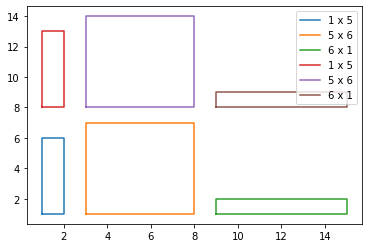

In [47]:
import functools
cuboid = (1, 5, 6)
start_point = [1, 1]
maximum_dimension = sorted(cuboid)[-1]
for it in range(2):
    for dim_id in range(3):
        next_dim = dim_id + 1
        if next_dim >= 3:
            next_dim = 0
        cur_surface = (cuboid[dim_id], cuboid[next_dim])
        factors = (cur_surface[0], cur_surface[1], -cur_surface[0], -cur_surface[1])
        p_1 = start_point.copy()
        p_2 = p_1.copy()
        points = [(p_1[0], p_1[1])]
        for f_counter in range(4):
            p_2[f_counter % 2] += factors[f_counter]
            points.append((p_2[0], p_2[1]))
            p_1 = p_2.copy()
        plt.plot([x[0] for x in points], [x[1] for x in points], 
                 label="%s x %s" % cur_surface)
        plt.legend()
        start_point[0] += (factors[0] + 1)
    start_point[0] = 1
    start_point[1] = 1 + maximum_dimension + 1

plt.show()

In [3]:
p = (1, 1, 1)
q = (1, 2, 1)
r = (1, 2, 2)
s = (1, 1, 2)
pq = [q[x] - p[x] for x in range(3)]
pr = [r[x] - p[x] for x in range(3)]
np.cross(pq, pr)

array([1, 0, 0])

In [10]:
ser = [Point(1, 2, 3), Point(4, 5, 6), Point(7, 8, 9), (10, 11, 12)]
len(list(filter(lambda x: type(x) != Point, ser)))


1